
<h2 align=center><font size = 5>COVID-19 Outbreak / Case study</font></h2>

    
<b>A description of the problem and a discussion of the background:</b>
For this submission, I will use the recent theme of the challenge we are currently facing globally (COVID-19).  Coronavirus disease (COVID-19) is an infectious disease caused by a new virus. The disease causes respiratory illness (like the flu) with symptoms such as a cough, fever, and in more severe cases, difficulty breathing. The new variant 2019-nCoV was first identified in Wuhan, the capital of China's Hubei province. People developed pneumonia without a clear cause and for which existing vaccines or treatments were not effective. The virus has shown evidence of human-to-human transmission
Transmission rate (rate of infection) appeared to escalate in mid-January 2020 As of 30 January 2020, approximately 8,243 cases have been confirmed.

<b>A description of the data and how it will be used to solve the problem:</b>
The file contains the cumulative count of confirmed, death and recovered cases of COVID-19 from different countries from 22nd January 2020.
1. Each row contains report from each region/location for each day
1. Each column represents the number of cases reported from each country/region

<b>Sources and Acknowledgements:</b>
1. Description of virus - https://www.bag.admin.ch/bag/en/home/krankheiten/ausbrueche-epidemien-pandemien/aktuelle-ausbrueche-epidemien/novel-cov.html
1. Source of COVID-19 Data - https://www.worldometers.info/coronavirus/ extracted on 23.03.2020 at 23:45 CET.
1. Good country index data - https://en.wikipedia.org/wiki/Good_Country_Index
1. Population of countries - https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)
1. Countries by GDP - https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)



    * Rohit Bhingare  
    * IBM Data Science Capstone - Week 4 and 5 Assignment
    * Date: 25.03.2020
    
Many thanks to the peer(s) for reviewing my work. I would appreciate your feedback and review points (if any).

### Disclaimer
1. I do not own this data and have not validated the correctness of this information.
1. The work is meant to perform a basic visualisation and try to explain whether COVID-19 outbreak can be explained by known Socioeconomic factors. 
1. This analysis is by no means complete (see Further Extension section)
1. Majority of this data is a point-in-time snapshot of information between 22 and 24 March 2020. Hence, may have changed since.

### Technologies
1. Jupyter Notebook
2. Python 3.6 Kernel
3. Key Python Libraries - Pandas (frames), BeautifulSoup (pre-processing), Folium (Choropleth maps), Nominatim (Geocoding), Matplotlib and Seaborn (charting), SciKit learn (Machine Learning)
4. IBM Cloud    

# Part 1
Build the dataframe

Before we get the data and start exploring it, let's download all the dependencies that we will need.

In [9]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install folium -c conda-forge
# !conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |   py36h9f0ad1d_1         149 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    openssl-1.1.1e             |       h516909a_0         2.1 MB  conda-forge
    folium-0.10.1              |             py_0          59 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTAL

## 1.1 Load the imported Excel data from private cloud
This section has the loading of Excel data mentioned above from my cloud account. Since it contains my credentials, I am concealing this section. But all it does is create a simple PANDAS dataframe with output below.

* Covid statistics data - Kaggle dataset from https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset
* Covid statistics live data - https://www.worldometers.info/coronavirus/
* Good country index data - https://en.wikipedia.org/wiki/Good_Country_Index
* Population of countries - https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)
* Countries by GDP - https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)

Additional information:
* Note that some countries do not have one or other stats. Also, since country names are written slightly differently across the links, I have cleaned them manually for consistency.

In [45]:
# The code was removed by Watson Studio for sharing.

,Country,Latitude,Longitude,TotalCases,Deaths,Recovered,Active,Population,GDP_USD_Mio,Science and Technology,Culture,International Peace and Security,World Order,Planet and Climate,Prosperity and Equality,Health and Well-being,PerCapitaCases,PerCapitaGDP
0,Netherlands,52.1326,5.2913,4749.0,213.0,2.0,4534.0,17097130.0,913658.0,8,2,27,3,19,4,9,0.000278,0.053439
1,Switzerland,46.8182,8.2275,8795.0,120.0,131.0,8544.0,8591365.0,705501.0,11,4,44,10,2,5,6,0.001024,0.082117
2,Denmark,56.2639,9.5018,1450.0,24.0,1.0,1425.0,5771876.0,352058.0,4,6,64,9,14,2,3,0.000251,0.060995
3,Finland,64.0000,26.0000,700.0,1.0,10.0,689.0,5532156.0,273961.0,7,13,52,8,6,9,12,0.000127,0.049522
4,Germany,51.0000,9.0000,29056.0,123.0,453.0,28480.0,83517045.0,3996759.0,21,15,37,2,18,14,7,0.000348,0.047856


<a id='item1'></a>

This section has the loading of Excel data mentioned above from my cloud account. Since it contains my credentials, I am concealing this section. But all it does is create a combined PANDAS dataframe with the country level statistical output below.

## 1.2 Perform data cleanup
* Rename columns, restrict to two days (first and last) and drop province/state level data.
* Remove any records with NaN and NULL records, to simplify the analysis.

In [46]:
dfcovid19.shape

(163, 18)

In [47]:
#Check if any country level duplicates:
dfcovid19['Country'].value_counts() # No duplicates

# Restrict to countries which have at least one case:
dfcovid19.dropna(inplace=True)

In [48]:
dfcovid19.shape
# Removed 24 records with NaN and NULLs

(139, 18)

# Part 2 - Visualise the data
Explore the global outbreak condition

## 2.1 Centre the map around Switzerland

In [49]:
address = 'Switzerland'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of ', address, ' are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of  Switzerland  are 46.7985624, 8.2319736.


## 2.2 Prepare the map of World using Folium

In [50]:
# Create map of World centered around Europe using latitude and longitude values
map_world = folium.Map(location=[latitude, longitude], zoom_start=3)

# add markers to map
for lat, lng, label in zip(dfcovid19['Latitude'], dfcovid19['Longitude'], dfcovid19['Country']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_world)

# Add the incidents to each country:
labels = list(dfcovid19['TotalCases'])

for lat, lng, label in zip(dfcovid19['Latitude'], dfcovid19['Longitude'], labels):
    folium.Marker([lat, lng], popup=label).add_to(map_world)

In [51]:
#labels
map_world

## 2.3 Prepare the Chloropeth map to see the countries that are most affected:

In [52]:
# download countries geojson file
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json -O world_countries.json
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [53]:
# Perform quick assessment of data frame:
dfcovid19.sort_values(by=['TotalCases'], ascending=False).head()

,Country,Latitude,Longitude,TotalCases,Deaths,Recovered,Active,Population,GDP_USD_Mio,Science and Technology,Culture,International Peace and Security,World Order,Planet and Climate,Prosperity and Equality,Health and Well-being,PerCapitaCases,PerCapitaGDP
75,China,30.9756,112.2707,81093.0,3270.0,72703.0,5120.0,1.433784e+09,13608152.0,70,111,40,109,96,113,48,0.000057,0.009491
15,Italy,43.0000,12.0000,63927.0,6077.0,7432.0,50418.0,6.055008e+07,2073902.0,41,26,55,14,7,36,24,0.001056,0.034251
24,United States,39.8494,-86.2583,43449.0,545.0,295.0,42609.0,3.290649e+08,20494100.0,38,67,72,29,35,62,10,0.000132,0.062280
17,Spain,40.0000,-4.0000,35136.0,2311.0,3355.0,29470.0,4.673678e+07,1426189.0,40,30,171,15,9,34,22,0.000752,0.030515
4,Germany,51.0000,9.0000,29056.0,123.0,453.0,28480.0,8.351704e+07,3996759.0,21,15,37,2,18,14,7,0.000348,0.047856


In [54]:
world_geo = r'world_countries.json' # geojson file

# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')
                       
# generate choropleth map using the total effect across the world
world_map.choropleth(
    geo_data=world_geo,
    data=dfcovid19,
    columns=['Country', 'TotalCases'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='COVID-19 Outbreak Chloropeth map'
)

# display map
world_map

/opt/conda/envs/Python36/lib/python3.6/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


### From the Chloropeth map, we clearly see that the most affected countries are China and Italy, based on just counts.

## 2.4 Let's create a pie-chart showing the distribution of outbreak for
* Total cases
* Deaths
* Recoveries/cases

In [55]:
# Import matplotlib
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.2


In [56]:
# Let's recheck our dataframe
dfcovid19.head(1)

,Country,Latitude,Longitude,TotalCases,Deaths,Recovered,Active,Population,GDP_USD_Mio,Science and Technology,Culture,International Peace and Security,World Order,Planet and Climate,Prosperity and Equality,Health and Well-being,PerCapitaCases,PerCapitaGDP
0,Netherlands,52.1326,5.2913,4749.0,213.0,2.0,4534.0,17097130.0,913658.0,8,2,27,3,19,4,9,0.000278,0.053439


In [57]:
dfcovid19['RR'] = dfcovid19['Recovered']/dfcovid19['TotalCases'] #Get ratio of relative recoveries, i.e. most recovered in a country normalised to overall cases

dfcovid19_top5T = dfcovid19.sort_values(by='TotalCases', ascending=False).head(5)
dfcovid19_top5D = dfcovid19.sort_values(by='Deaths', ascending=False).head(5)

dfcovid19_top5RR = dfcovid19.sort_values(by='RR', ascending=False).head(5)
dfcovid19_bottom20RR = dfcovid19.sort_values(by='Recovered', ascending=False).tail(20)

colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', ]
explode_list = [0.2, 0.1, 0, 0, 0] # ratio for each continent with which to offset each wedge.

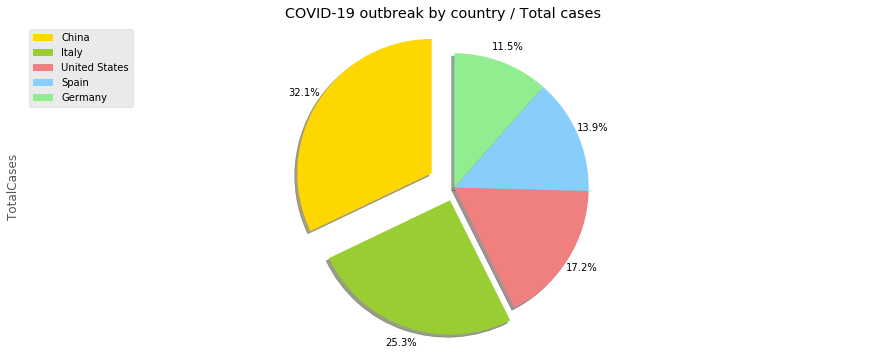

In [58]:
# autopct create %, start angle represent starting point
dfcovid19_top5T['TotalCases'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' highest 2 countries
                            )

plt.title('COVID-19 outbreak by country / Total cases')
plt.axis('equal') # Sets the pie chart to look like a circle.

# add legend
plt.legend(labels=dfcovid19_top5T['Country'], loc='upper left') 
plt.show()

We see that China and Italy have the highest spread, followed by USA, Spain and Germany

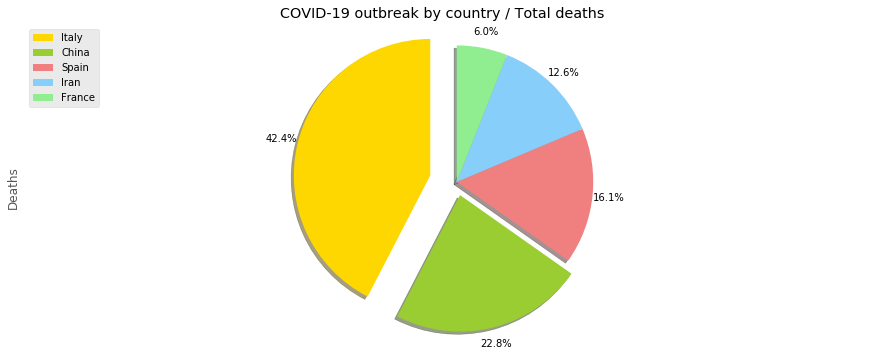

In [59]:
# autopct create %, start angle represent starting point
dfcovid19_top5D['Deaths'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' highest 2 countries
                            )

plt.title('COVID-19 outbreak by country / Total deaths')
plt.axis('equal') # Sets the pie chart to look like a circle.

# add legend
plt.legend(labels=dfcovid19_top5D['Country'], loc='upper left') 
plt.show()

We see that Italy has the highest reported deaths so far, followed by China, Spain, Iran and France

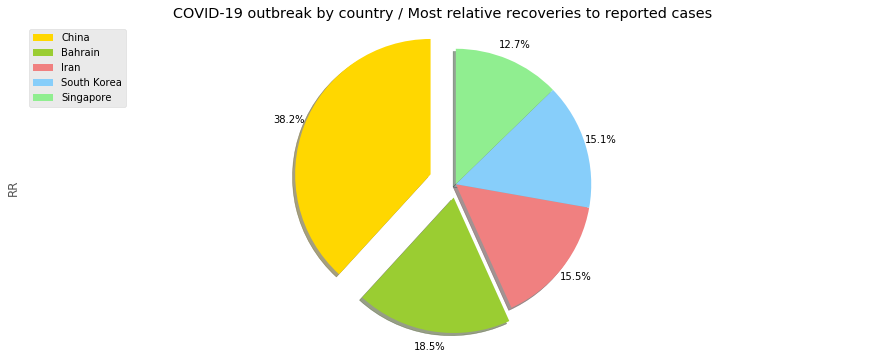

In [60]:
# autopct create %, start angle represent starting point
dfcovid19_top5RR['RR'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' highest 2 countries
                            )

plt.title('COVID-19 outbreak by country / Most relative recoveries to reported cases')
plt.axis('equal') # Sets the pie chart to look like a circle.

# add legend
plt.legend(labels=dfcovid19_top5RR['Country'], loc='upper left') 
plt.show()

In [61]:
# autopct create %, start angle represent starting point
dfcovid19_bottom20RR[['Country', 'TotalCases', 'Recovered']]

,Country,TotalCases,Recovered
96,Mongolia,10.0,0.0
63,Fiji,3.0,0.0
98,Bolivia,27.0,0.0
65,Guatemala,20.0,0.0
100,Zambia,3.0,0.0
101,Rwanda,36.0,0.0
102,Togo,18.0,0.0
103,Ghana,27.0,0.0
90,Grenada,1.0,0.0
119,Madagascar,12.0,0.0


These 20 countries have the lowest reported recovery rate to the reported cases

# Part 3 - Machine learning
Let's perform some high-level machine learning to see whether we can explain some of the outbreak rates against the economic indices

## 3.1 Plot some of the economic indices against the outbreaks to see if we see a linear relationship

### Let's plot each of these features vs the total cases, to see how linear is their relation:

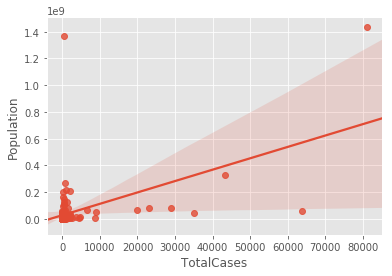

In [62]:
import seaborn as sns
ax = sns.regplot(x='TotalCases', y='Population', data=dfcovid19)

Observation 1 - Fairly obvious, but we see a somewhat linear relationship between population and total cases reported.

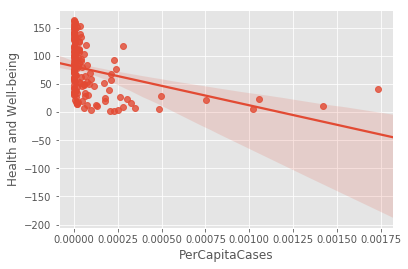

In [63]:
ax = sns.regplot(x='PerCapitaCases', y='Health and Well-being', data=dfcovid19)

Observation 2 - Again expected, but we see a inverse linear relationship between economic health and well-being index and per capita cases reported.

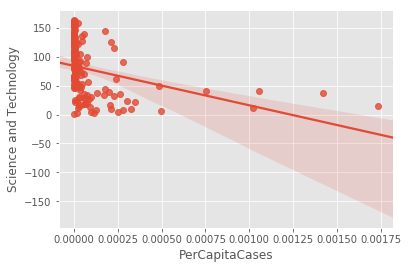

In [64]:
ax = sns.regplot(x='PerCapitaCases', y='Science and Technology', data=dfcovid19)

Observation 3 - Similar to 2, we see a inverse linear relationship between Science and Technology index and per capita cases reported.

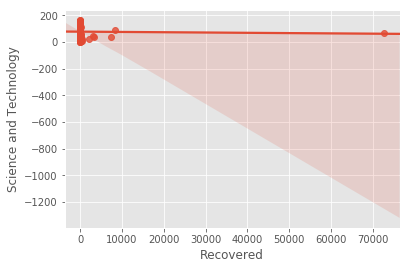

In [65]:
ax = sns.regplot(x='Recovered', y='Science and Technology', data=dfcovid19)

Observation 4 - This one is interesting. GDP of the country does not seem to give any clear correlation to higher/lower reported cases per capita. Possibly due to being skewed due to China and Italy. Let's recalculate these numbers without the outliers to see if we see a correlation.

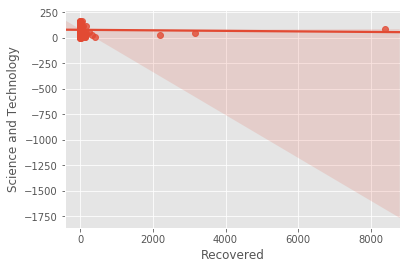

In [66]:
dfcovid19_rest=dfcovid19[(dfcovid19.Country != 'China') & (dfcovid19.Country != 'Italy')  & (dfcovid19.Country != 'United States') & (dfcovid19.Country != 'Spain') & (dfcovid19.Country != 'Germany')]
ax = sns.regplot(x='Recovered', y='Science and Technology', data=dfcovid19_rest)

Observation 5 - Not a clear linear correlation. Let's build the machine learning model now.

## 3.2 Build a Simple  Regression Model for one feature

In [76]:
from sklearn import linear_model
import numpy as np
regr = linear_model.LinearRegression()

# Prepare training and test datasets:
msk = np.random.rand(len(dfcovid19)) < 0.8 # 80-20%
train = dfcovid19[msk]
test = dfcovid19[~msk]

train_x = np.asanyarray(train[['Health and Well-being']])
train_y = np.asanyarray(train[['PerCapitaCases']])

regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-1.41818882e-06]]
Intercept:  [0.00018779]


### Validate the linear regression model

In [77]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Health and Well-being']])
test_y = np.asanyarray(test[['PerCapitaCases']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 0.00
Residual sum of squares (MSE): 0.00
R2-score: -19.81


Since simple linear model is not a good fit, let's fit a polynomial regression

## 3.3 Build a Polynomial Regression Model for one feature

In [85]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
# train_x_poly

clf = linear_model.LinearRegression()
clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.00000000e+00 -3.36992607e-06  1.22659060e-08]]
Intercept:  [0.00024103]


### Validate the polynomial regression model

In [79]:
test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 0.00
Residual sum of squares (MSE): 0.00
R2-score: -15.36


Still not a very good fit. Let's see if we can perform a multiple regression model

## 3.4 Build a Multiple Regression Model

In [88]:
regr = linear_model.LinearRegression()
train_x_mult = np.asanyarray(train[['Health and Well-being', 'Science and Technology', 'PerCapitaGDP', 'Latitude', 'Longitude', 'Population']])
train_y = np.asanyarray(train[['PerCapitaCases']])
regr.fit(train_x_mult, train_y)

print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[ 6.78197094e-07  1.46503104e-07  6.84040776e-03  1.76275251e-06
  -1.90077337e-07  1.80054814e-14]]
Intercept:  [-0.00012148]


### Validate the multiple regression model

In [89]:
y_hat= regr.predict(test[['Health and Well-being', 'Science and Technology', 'PerCapitaGDP', 'Latitude', 'Longitude', 'Population']])
x = np.asanyarray(test[['Health and Well-being', 'Science and Technology', 'PerCapitaGDP', 'Latitude', 'Longitude', 'Population']])
y = np.asanyarray(test[['PerCapitaCases']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))
print("R2-score: %.2f" % r2_score(y_hat, test_y) )

Residual sum of squares: 0.00
Variance score: 0.61
R2-score: -0.29


# 4. Conclusions/Observations
1. We observe that though China has the highest outbreak, it also has the highest recoveries per outbreak compared to the other countries.
1. We observe that Italy has the highest deaths (total and per capita) compared to the rest of the countries.
1. We observe From the Choropleth World Map that the major outbreak of COVID-19 has occurred in China and Europe only.
1. We saw that there are many countries where there is no recovery. Based on the statistics, it appears that majority of these countries are in Africa.
1. There is a clear correlation between population of country to the total cases that are reported, both statistically and visually (from the data as well as seaborn graphs).
1. We looked into providing a correlation of corona virus outbreak from various economic factors for a country. We were able to see a clear correlation for some factors.
1. There  appears to be an inverse correlation between the good countries index against the outbreak (though not absolutely clear), e.g. We saw that Science and Technology as well as Health and Well-being indices showed a correlation visually, though it is somewhat complex to fit when a machine learning model was created.
    

# 5. Further extension scope

1. Analyse the time series version of COVID-19 data from KAGGLE. This data provides a daily statistic for last 2 months. It will be interesting to further explore the theme of "rate of recovery" across the months for the outspread per country against the good country KPIs.
1. Analyse the COVID-19 outbreak from a cause-effect perspective, i.e. what effect it has on other socioeconomic factors such as financial indices, situation in hospitals as well as job market. This would be an interesting theme to explore deeper.
1. Analyse the mortality/illness rates in countries in the previous years during the same/similar times to see how much effect COVID-19 outbreak has on them.
1. Drill-down further on the COVID-19 outbreak individuals per country and address whether the individuals had previous history of illnesses.